In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_test_data/training_data.csv')

# EDA

In [3]:
df.head(4)

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2


In [4]:
# check for nans
df.isna().sum()

text     0
label    0
dtype: int64

In [5]:
# check for unique values in label column
unique_labels = df['label'].unique()
unique_labels

array([2, 3, 1, 0])

In [6]:
# check for class distribution
label_distribution = df['label'].value_counts()
label_distribution

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

In [7]:
# calculate word count of each text
df['word_count'] = df['text'].str.split().str.len()

# calculate min, max, and average word count
min_word_count = df['word_count'].min()
max_word_count = df['word_count'].max()
average_word_count = df['word_count'].mean()

print(f"Minimum Word Count: {min_word_count}")
print(f"Maximum Word Count: {max_word_count}")
print(f"Average Word Count: {average_word_count}")

Minimum Word Count: 8
Maximum Word Count: 177
Average Word Count: 37.84745


In [8]:
random_rows = df['text'].sample(5)
for row in random_rows:
    print(row)
    print("\n")

Ten things we learned this week in the NBA 1. Item: At 71, Hubie Brown suddenly retired as coach of the Memphis Grizzlies Thursday night. Brown, who was 83-65 with the Grizzlies in parts of three seasons, said unexpected health issues were the cause 


Radical cleric issues fatwa demanding release of French reporters (AFP) AFP - A leading radical Iraqi cleric issued a fatwa (Islamic decree) demanding the immediate release of two French reporters held hostage for more than two weeks.


Primate researcher brings environmental message to Singapore &lt;b&gt;...&lt;/b&gt; Dr Jane Goodall delivers her keynote speech while a picture of a chimpanzee which she calls her oldest chimp friend is projected in the background, in Singapore during the Biology in Asia International Conference.


A Patent Strain on Innovation OCTOBER 04, 2004 (COMPUTERWORLD) - Some things are patently ridiculous. One is the US patent system, an institution in desperate need of reform.


Calif. Lawmaker Seeks End of Bowl

In [9]:
# finding rows with the min word count
min_word_count_rows = df[df['word_count'] == df['word_count'].min()].reset_index(drop=True)
# finding rows with the max word count
max_word_count_rows = df[df['word_count'] == df['word_count'].max()].reset_index(drop=True)

In [10]:
print("min word count rows:")
for text in min_word_count_rows["text"]:
    print(f"{text}\n\n")

min word count rows:
Stocks to Watch  ORACLE CORP. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=ORCL.O target=/stocks/quickinfo/fullquote"&gt;ORCL.O&lt;/A&gt;:


Stocks to Watch  DELL INC. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=DELL.O target=/stocks/quickinfo/fullquote"&gt;DELL.O&lt;/A&gt;:


The PeopleSoft vs. Oracle clash &lt;strong&gt;A &lt;cite&gt;Register&lt;/cite&gt; History&lt;/strong&gt; 


WIZARDSINSIDER  WHO'S NEXT? &lt;br&gt;at Lakers&lt;br&gt;Friday, 10:30 p.m.&lt;br&gt;Comcast SportsNet




In [11]:
print("max word count rows:")
for text in max_word_count_rows["text"]:
    print(f"{text}\n\n")

max word count rows:
2004 US Senate Outlook With all the hoopla over Bush and Kerry, some of you may not have been paying close attention to the other races going on in this loaded US political season. I've read a good dozen or so Senate outlooks, and my blurry eyes and spinning brain kept getting lost in all the numbers and losing track of who, ultimately, was likely to control the Senate on November third. So I made my very own Senate outlook to figure it out (or add further confusion, depending on what you think of my predictions). The bad news is, we probably won't know who controls the Senate on November third. The good news, if you're a Democrat (or a person who loves one), is that my best guess at this point is that when the dust settles, Democrats will probably be in control by the very slimmest possible margin. Shock! But everyone knows the Dems have no chance of taking either house of Congress. I think everyone hasn't been paying attention. Read on for my rundown.




# Data clean and preprocess

In [12]:
from bs4 import BeautifulSoup
import html
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# download NLTK resources
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

def clean_text(text):
    # decode HTML entities
    text = html.unescape(text)
    # remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text().strip()

def preprocess_text(text):
    # remove newline characters
    text = text.replace("\n", " ") 
    # lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


[nltk_data] Downloading package punkt to /home/sakii/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sakii/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sakii/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df['clean_text'] = df['text'].map(clean_text).map(preprocess_text)

In [14]:
df.head()

,text,label,word_count,clean_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,21,wall st bear claw back black reuters reuters s...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,36,carlyle look toward commercial aerospace reute...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,36,oil economy cloud stock outlook reuters reuter...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,36,iraq halt oil export main southern pipeline re...
4,"Oil prices soar to all-time record, posing new...",2,37,oil price soar alltime record posing new menac...


# Traditional machine learning models

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
# split data
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Naive bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
# trying different ngram ranges
for ngram_range in [(1, 1), (1, 2), (2, 2)]:
    print(f"Testing ngram_range={ngram_range}")
    
    # vectorize text
    tfidf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=10000)
    # tested multiple max_features value, 10000 is good balance for traning time and accuracy 
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    
    # train Naive Bayes and evaluate model
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")
    print('\n')

Testing ngram_range=(1, 1)
Accuracy: 0.9029166666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5891
           1       0.95      0.98      0.96      6009
           2       0.88      0.87      0.87      6019
           3       0.88      0.88      0.88      6081

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000

Confusion Matrix:
 [[5233  206  274  178]
 [  64 5887   24   34]
 [ 191   64 5214  550]
 [ 240   60  445 5336]]




Testing ngram_range=(1, 2)
Accuracy: 0.9025
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5891
           1       0.95      0.98      0.96      6009
           2       0.88      0.86      0.87      6019
           3       0.87      0.88      0.88      6081

    accuracy                 

In [19]:
# TF-IDF vectorization with best parameters
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [20]:
## best naive bayes model
# retrain with best parameters for naive bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print('\n')

Accuracy: 0.9025
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5891
           1       0.95      0.98      0.96      6009
           2       0.88      0.86      0.87      6019
           3       0.87      0.88      0.88      6081

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000

Confusion Matrix:
 [[5251  215  250  175]
 [  61 5890   23   35]
 [ 207   69 5166  577]
 [ 240   58  430 5353]]






## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# train Logistic Regression
logistic_regression = LogisticRegression(max_iter=5000, random_state=42)
logistic_regression.fit(X_train_tfidf, y_train)
y_pred_lr = logistic_regression.predict(X_test_tfidf)
# evaluate Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Results:
Accuracy: 0.9160416666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91      5891
           1       0.95      0.98      0.97      6009
           2       0.89      0.89      0.89      6019
           3       0.89      0.89      0.89      6081

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000

Confusion Matrix:
 [[5321  172  216  182]
 [  63 5885   33   28]
 [ 174   52 5350  443]
 [ 184   62  406 5429]]


## SVM

In [23]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [24]:
import warnings
warnings.filterwarnings('ignore')
# define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1.0, 10.0],           # regularization strength
    'loss': ['hinge', 'squared_hinge'],  # loss function
    'dual': [True, False]             # dual or primal formulation
}

# initialize LinearSVC
svm = LinearSVC(random_state=42)

# gridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',  # use accuracy as the evaluation metric
    cv=3,                # 3-fold cross-validation
    n_jobs=-1           # use all available CPU cores
)

# fit the model
grid_search.fit(X_train_tfidf, y_train)

# get the best model
best_svm = grid_search.best_estimator_

# predict on the test set
y_pred_svm = best_svm.predict(X_test_tfidf)

# evaluate SVM
print("Best Parameters:", grid_search.best_params_)
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

/home/sakii/anaconda3/envs/assesment/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sakii/anaconda3/envs/assesment/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sakii/anaconda3/envs/assesment/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sakii/anaconda3/envs/assesment/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/sakii/anaconda3/envs/assesment/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 1.0, 'dual': True, 'loss': 'hinge'}
SVM Results:
Accuracy: 0.9185833333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92      5891
           1       0.95      0.98      0.97      6009
           2       0.89      0.89      0.89      6019
           3       0.89      0.90      0.90      6081

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000

Confusion Matrix:
 [[5289  183  231  188]
 [  48 5912   29   20]
 [ 142   60 5370  447]
 [ 172   53  381 5475]]


## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],  # number of trees
    'max_depth': [None, 10, 20],  # maximum depth of the trees
    'max_features': ['sqrt', 'log2'],  # number of features to consider at each split
    'min_samples_split': [2, 5],  # minimum number of samples required to split a node
    'min_samples_leaf': [1, 2]    # minimum number of samples required at a leaf node
}

# initialize Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# use gridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',  # use accuracy as the evaluation metric
    cv=3,                # 3-fold cross-validation
    n_jobs=-1           # use all available CPU cores
)

# fit the model
grid_search.fit(X_train_tfidf, y_train)

# get the best model
best_rf = grid_search.best_estimator_

# predict on the test set
y_pred_rf = best_rf.predict(X_test_tfidf)

# evaluate Random Forest
print("Best Parameters:", grid_search.best_params_)
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Results:
Accuracy: 0.90725
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      5891
           1       0.94      0.98      0.96      6009
           2       0.89      0.87      0.88      6019
           3       0.88      0.88      0.88      6081

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000

Confusion Matrix:
 [[5265  209  231  186]
 [  56 5888   30   35]
 [ 175   86 5254  504]
 [ 217   86  411 5367]]


## Testing continuous bag of words approach (fasttext)

In [27]:
import fasttext
import re

In [28]:
# function to prepare data in fasttext format
def prepare_fasttext_data(X_train, X_test, y_train, y_test, train_filename, test_filename):
    # create DataFrames for training and test data
    train_df = pd.DataFrame({'text': X_train, 'label': y_train})
    test_df = pd.DataFrame({'text': X_test, 'label': y_test})
    
    # clean the text data using regex
    def clean_text(text):
        # replace all newlines and multiple spaces with a single space
        text = re.sub(r'\n+', ' ', text)
        text = re.sub(r'\s+', ' ', text)  # \s+ matches any whitespace character
        return text.strip()  # remove leading/trailing spaces
    
    train_df['text'] = train_df['text'].apply(clean_text)
    test_df['text'] = test_df['text'].apply(clean_text)
    
    # format the data for FastText
    train_df['fasttext_format'] = '__label__' + train_df['label'].astype(str) + ' ' + train_df['text']
    test_df['fasttext_format'] = '__label__' + test_df['label'].astype(str) + ' ' + test_df['text']
    
    # save the formatted data to .train and .test files
    train_df['fasttext_format'].to_csv(train_filename, index=False, header=False, encoding='utf-8')
    test_df['fasttext_format'].to_csv(test_filename, index=False, header=False, encoding='utf-8')

    print(f"FastText data saved to {train_filename} and {test_filename}")

train_file = 'fasttext_train_test_data/train.train'
test_file = 'fasttext_train_test_data/test.test'

# prepare training and test data for fasttext
prepare_fasttext_data(X_train, X_test, y_train, y_test, train_file, test_file)

FastText data saved to fasttext_train_test_data/train.train and fasttext_train_test_data/test.test


In [29]:
# depending on the data, there might still be a few bad rows. these functions are used to clean those up
def remove_quotes(filename):
    with open(filename, 'r') as file:
        content = file.read()
    
    while '"' in content:
        first_quote_index = content.find('"')
        if first_quote_index != -1:
            second_quote_index = content.find('"', first_quote_index + 1)
            if second_quote_index != -1:
                content = content[:first_quote_index] + content[second_quote_index + 1:]
    
    with open(filename, 'w') as file:
        file.write(content)
        
def remove_blank_lines(filename):
    # Read the file
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Remove blank lines
    non_blank_lines = [line.strip() for line in lines if line.strip()]
    
    # Write the non-blank lines back to the file
    with open(filename, 'w') as file:
        file.write('\n'.join(non_blank_lines))
        
remove_blank_lines(train_file)
remove_blank_lines(test_file)
print('remove_blank_lines DONE!')

remove_quotes(train_file)
remove_quotes(test_file)
print('remove_quotes DONE!')
# the generated .train and .test file can now be used to train/test the fasttext model

remove_blank_lines DONE!
remove_quotes DONE!


In [30]:
# train and evaluate FastText model
def train_evaluate_fasttext(params):
    # train model
    model = fasttext.train_supervised(input=train_file, **params)
    
    # predict on the test set
    y_pred = []
    y_test_labels = []
    
    with open(test_file, 'r', encoding='utf-8') as f:
        for line in f:
            # extract the label and text
            label = line.split(' ', 1)[0]
            text = line.split(' ', 1)[1]
            
            # remove newline characters from the text
            text = text.replace('\n', ' ').strip()  # replace newlines with a space and strip extra spaces
            
            # Predict the label
            pred_label = model.predict(text)[0][0]  # get the predicted label
            y_pred.append(int(pred_label.split('__label__')[1]))  # extract the label number
            y_test_labels.append(int(label.split('__label__')[1]))  # extract the true label number
    
    # Evaluate the model
    accuracy = accuracy_score(y_test_labels, y_pred)
    report = classification_report(y_test_labels, y_pred)
    cm = confusion_matrix(y_test_labels, y_pred)
    
    return accuracy, report, cm

In [32]:
# define the parameter grid for tuning
param_grid = {
    'lr': [0.1, 0.05, 0.01],  # learning rate
    'epoch': [10, 20, 30],     # number of epochs
    'wordNgrams': [1, 2],       # number of word n-grams
    'dim': [100, 200]           # dimension of word vectors
}

# manual grid search
fasttext_best_accuracy = 0
fasttext_best_params = None
fasttext_best_report = None
fasttext_best_cm = None

for lr in param_grid['lr']:
    for epoch in param_grid['epoch']:
        for wordNgrams in param_grid['wordNgrams']:
            for dim in param_grid['dim']:
                params = {
                    'lr': lr,
                    'epoch': epoch,
                    'wordNgrams': wordNgrams,
                    'dim': dim
                }
                print(f"Testing parameters: {params}")
                accuracy, report, cm = train_evaluate_fasttext(params)
                
                if accuracy > fasttext_best_accuracy:
                    fasttext_best_accuracy = accuracy
                    fasttext_best_params = params
                    fasttext_best_report = report
                    fasttext_best_cm = cm

# best results
print("Best Parameters:", fasttext_best_params)
print("FastText Results:")
print("Accuracy:", fasttext_best_accuracy)
print("Classification Report:\n", fasttext_best_report)
print("Confusion Matrix:\n", fasttext_best_cm)

Testing parameters: {'lr': 0.1, 'epoch': 10, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4806191 lr:  0.000000 avg.loss:  0.192318 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 10, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4021085 lr:  0.000000 avg.loss:  0.190645 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 10, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 2010731 lr:  0.000000 avg.loss:  0.114738 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 10, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1091702 lr:  0.000000 avg.loss:  0.117783 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 20, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 5357139 lr:  0.000000 avg.loss:  0.136974 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 20, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 3992662 lr:  0.000000 avg.loss:  0.129073 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 20, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 2007596 lr:  0.000000 avg.loss:  0.058998 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 20, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1114546 lr:  0.000000 avg.loss:  0.056011 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 30, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 5559247 lr:  0.000000 avg.loss:  0.093378 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 30, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4023933 lr:  0.000000 avg.loss:  0.101853 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 30, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1891608 lr:  0.000000 avg.loss:  0.041100 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.1, 'epoch': 30, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1106765 lr:  0.000000 avg.loss:  0.040590 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 10, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4819473 lr:  0.000000 avg.loss:  0.224859 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 10, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4021538 lr:  0.000000 avg.loss:  0.225494 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 10, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1850061 lr:  0.000000 avg.loss:  0.202248 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 10, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1088781 lr:  0.000000 avg.loss:  0.201689 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 20, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 5358486 lr:  0.000000 avg.loss:  0.158185 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 20, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4019420 lr:  0.000000 avg.loss:  0.156201 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 20, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1922749 lr:  0.000000 avg.loss:  0.098084 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 20, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1139813 lr:  0.000000 avg.loss:  0.096577 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 30, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 5568418 lr:  0.000000 avg.loss:  0.122203 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 30, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4014292 lr:  0.000000 avg.loss:  0.118387 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 30, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1953444 lr:  0.000000 avg.loss:  0.069953 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.05, 'epoch': 30, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1144625 lr:  0.000000 avg.loss:  0.066956 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 10, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4822065 lr:  0.000000 avg.loss:  0.440241 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 10, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4021683 lr:  0.000000 avg.loss:  0.459511 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 10, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1705288 lr:  0.000000 avg.loss:  0.638141 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 10, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1149148 lr:  0.000000 avg.loss:  0.646468 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 20, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 5357017 lr:  0.000000 avg.loss:  0.309456 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 20, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4018300 lr:  0.000000 avg.loss:  0.317925 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1847094 lr:  0.000000 avg.loss:  0.403276 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1119562 lr:  0.000000 avg.loss:  0.405407 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 30, 'wordNgrams': 1, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 5553728 lr:  0.000000 avg.loss:  0.259115 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 30, 'wordNgrams': 1, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 4011149 lr:  0.000000 avg.loss:  0.263815 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 30, 'wordNgrams': 2, 'dim': 100}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1948091 lr:  0.000000 avg.loss:  0.289381 ETA:   0h 0m 0s


Testing parameters: {'lr': 0.01, 'epoch': 30, 'wordNgrams': 2, 'dim': 200}


Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1126391 lr:  0.000000 avg.loss:  0.295695 ETA:   0h 0m 0s


Best Parameters: {'lr': 0.05, 'epoch': 10, 'wordNgrams': 2, 'dim': 200}
FastText Results:
Accuracy: 0.920125
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      5891
           1       0.96      0.98      0.97      6009
           2       0.90      0.89      0.90      6019
           3       0.90      0.90      0.90      6081

    accuracy                           0.92     24000
   macro avg       0.92      0.92      0.92     24000
weighted avg       0.92      0.92      0.92     24000

Confusion Matrix:
 [[5365  155  200  171]
 [  90 5872   26   21]
 [ 180   47 5365  427]
 [ 177   48  375 5481]]


# Side by side normalized heatmap comparison of all class labels for all models

In [42]:
cms = [
    confusion_matrix(y_test, y_pred),
    confusion_matrix(y_test, y_pred_lr),
    confusion_matrix(y_test, y_pred_svm),
    confusion_matrix(y_test, y_pred_rf),
    fasttext_best_cm
]

titles = ["Naive bayes",
"Logistic Regression",
"SVM",
"Random Forest",
"Fasttext"]

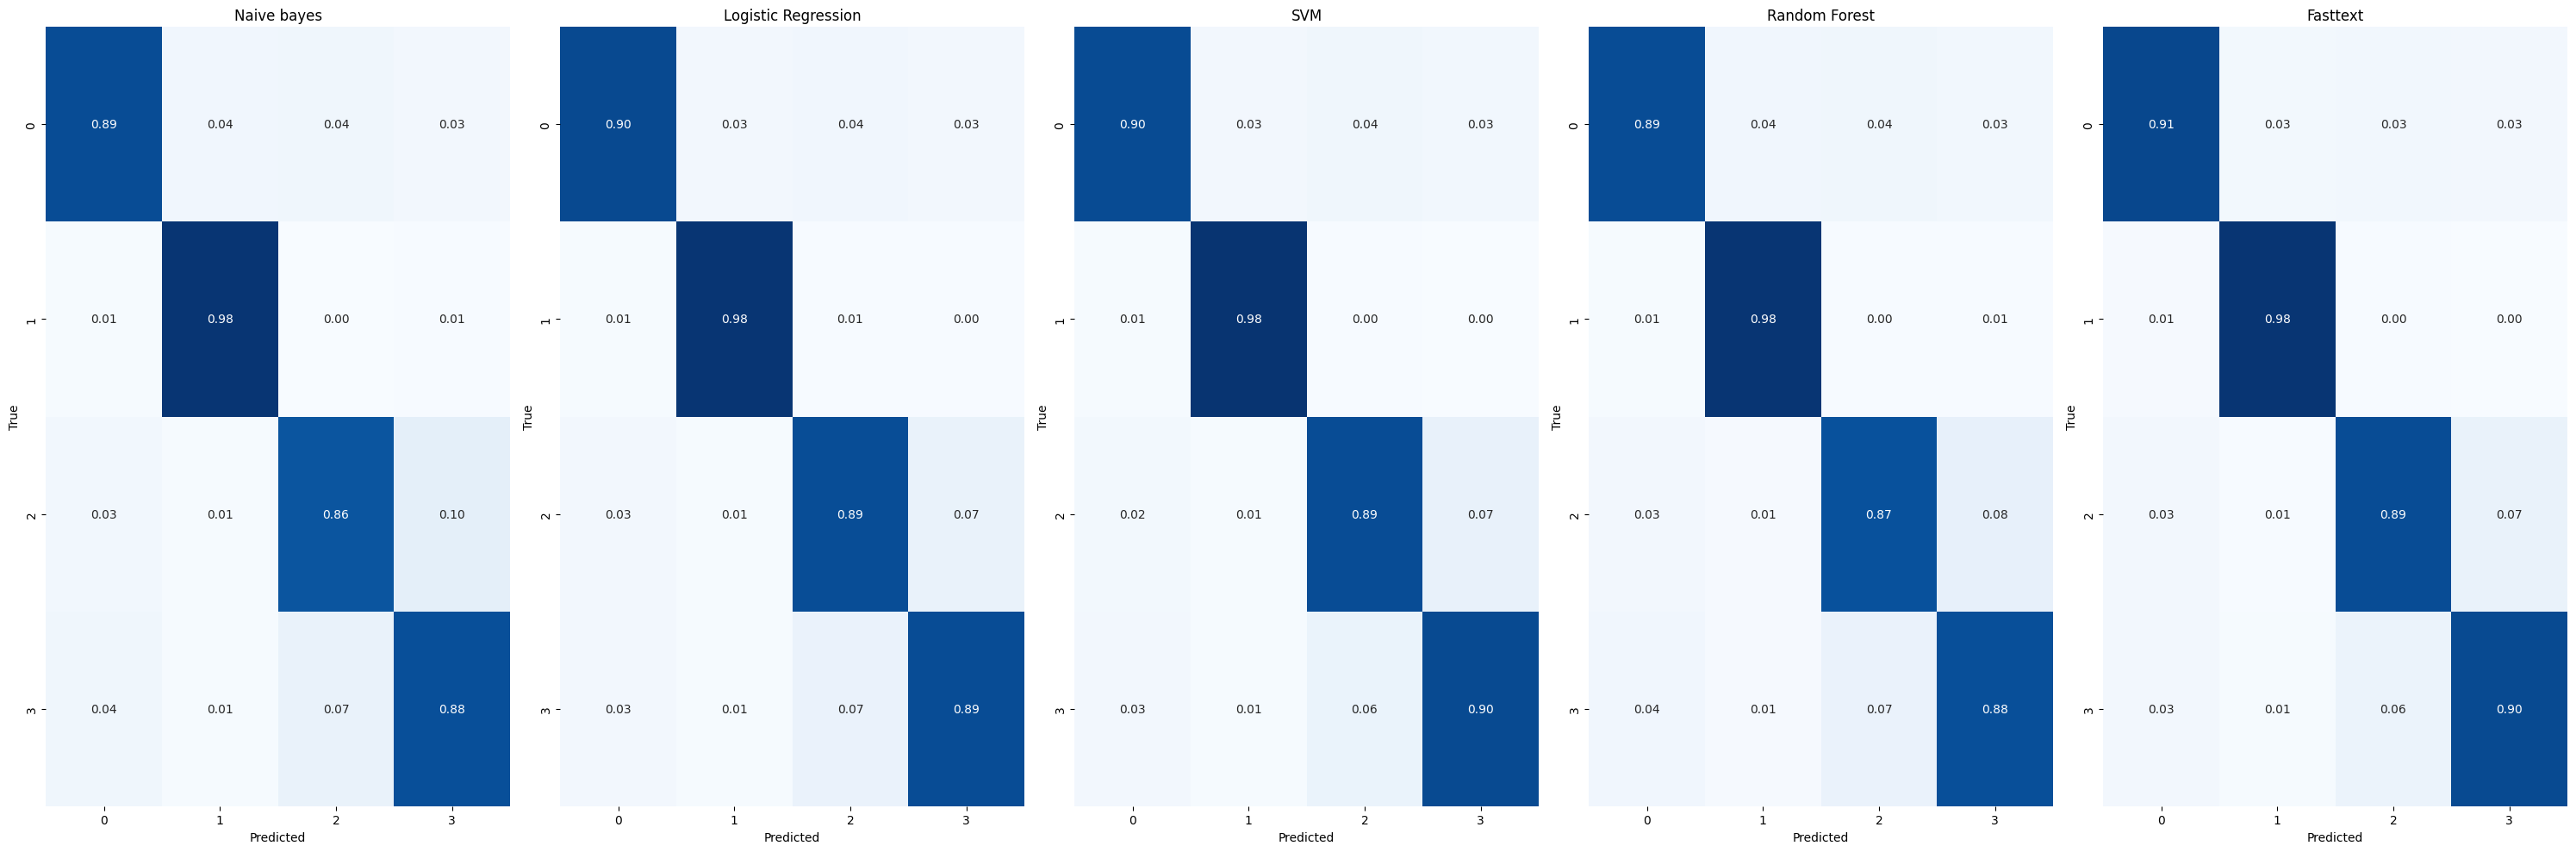

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def normalize_confusion_matrix(cm):
    """normalize the confusion matrix by row (true labels)."""
    return cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

def plot_side_by_side_normalized_confusion_matrices(cms, titles, filename='confusion_matrices.png'):
    """
    Plot multiple normalized confusion matrices side by side and save the figure.
    """
    num_models = len(cms)
    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 10))  # Adjust figure size based on the number of models
    
    for i, (cm, title) in enumerate(zip(cms, titles)):
        # Normalize the confusion matrix
        cm_normalized = normalize_confusion_matrix(cm)
        
        # Plot the heatmap
        sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', cbar=False, ax=axes[i], vmin=0, vmax=1)
        axes[i].set_title(title)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')
    
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # Save the figure
    plt.show()

plot_side_by_side_normalized_confusion_matrices(cms, titles, filename='normalized_heatmap_comparison_all_class_labels.png')

# Side by side normalized misclassification patterns comparison of all models

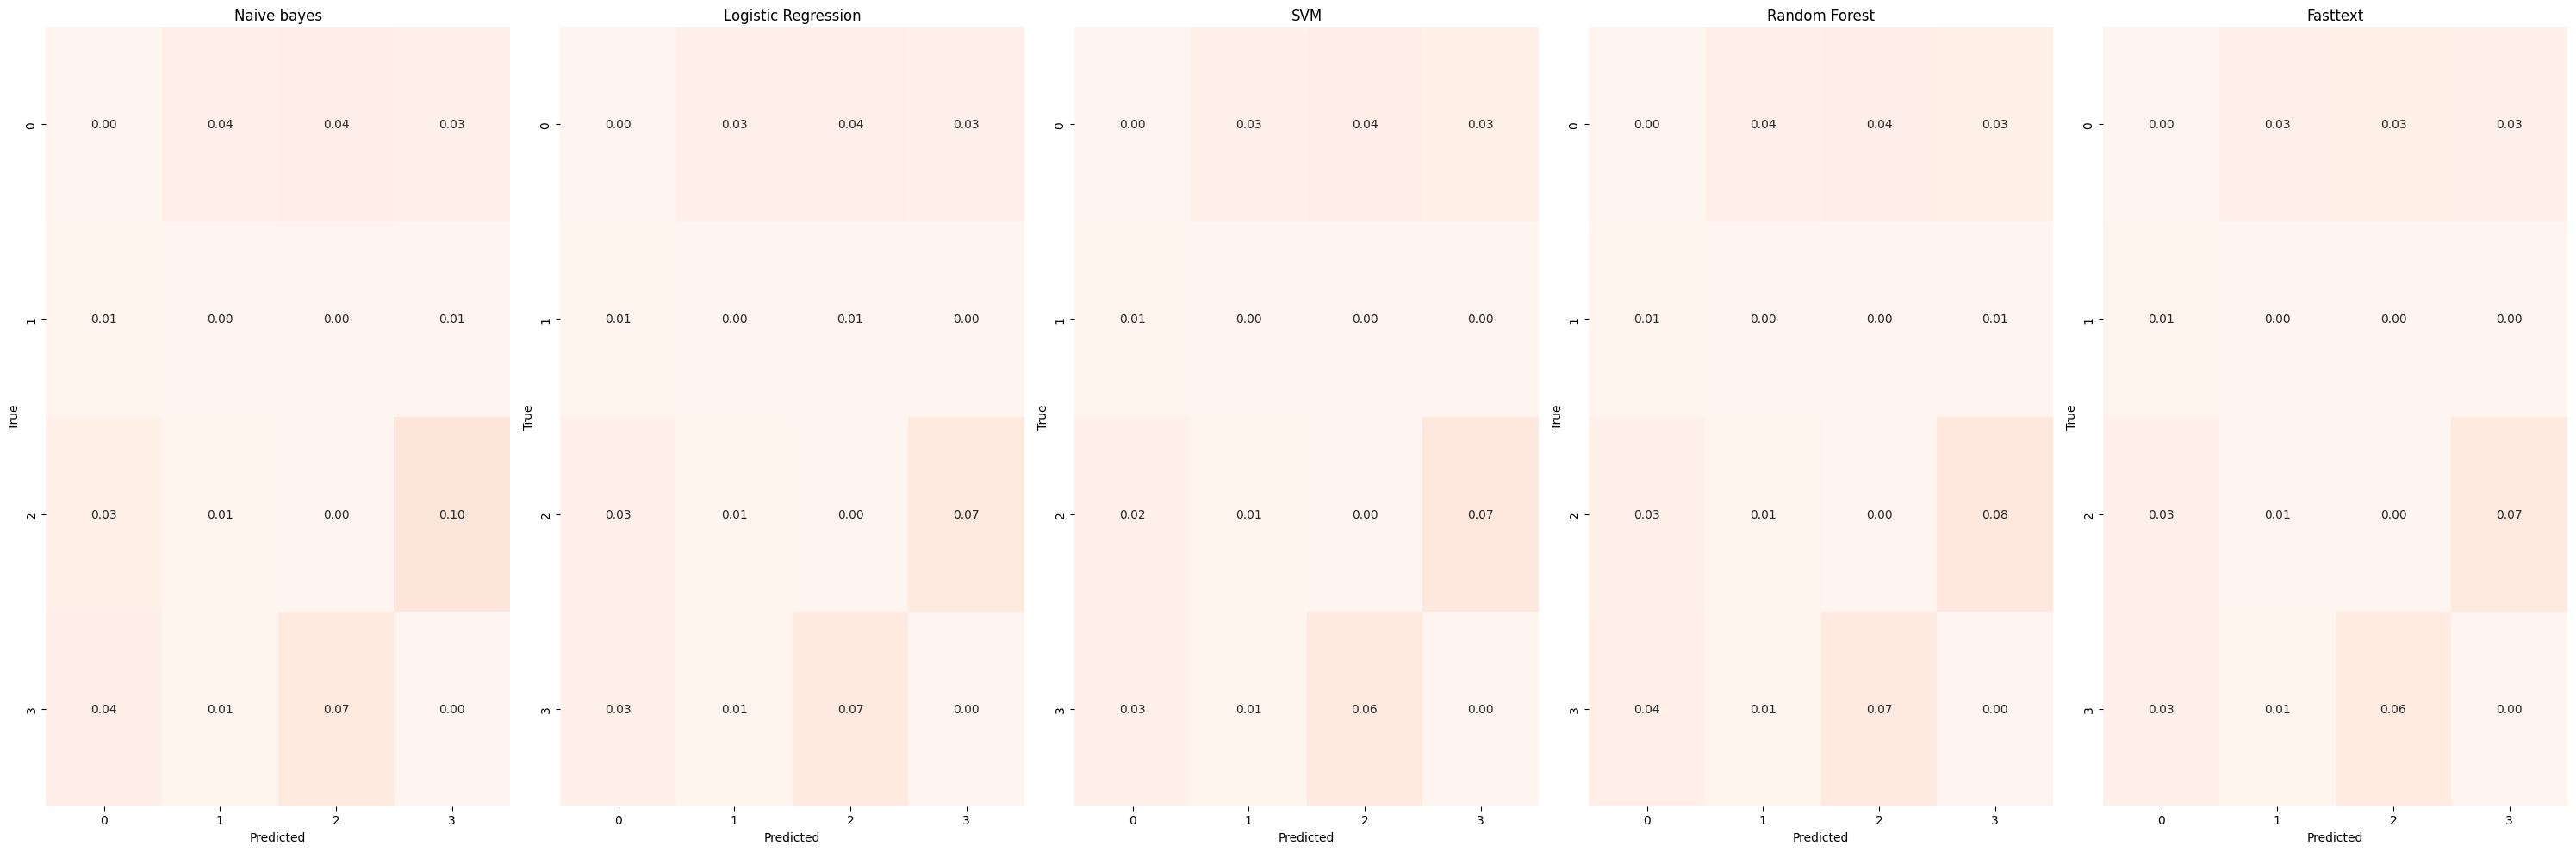

In [46]:
def normalize_misclassification_pattern(cm):
    """
    Normalize the confusion matrix and set diagonal to zero to focus on misclassifications.
    
    Parameters:
        cm (2D array): Confusion matrix.
    
    Returns:
        cm_normalized (2D array): Normalized confusion matrix with diagonal set to zero.
    """
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row
    np.fill_diagonal(cm_normalized, 0)  # Set diagonal to zero
    return cm_normalized

def plot_side_by_side_misclassification_patterns(cms, titles, save_path='misclassification_patterns.png'):
    """
    Plot side-by-side heatmaps of normalized misclassification patterns.
    
    Parameters:
        cms (list of 2D arrays): List of confusion matrices.
        titles (list of str): Titles for each subplot.
        save_path (str): Path to save the image.
    """
    num_models = len(cms)
    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 10))  # Adjust figure size based on the number of models
    
    for i, (cm, title) in enumerate(zip(cms, titles)):
        # Normalize and set diagonal to zero
        cm_misclassification = normalize_misclassification_pattern(cm)
        
        # Plot the heatmap
        sns.heatmap(cm_misclassification, annot=True, fmt='.2f', cmap='Reds', cbar=False, ax=axes[i], vmin=0, vmax=1)
        axes[i].set_title(title)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Save the plot
    plt.show()

# Plot and save the side-by-side misclassification patterns
plot_side_by_side_misclassification_patterns(cms, titles, save_path='misclassification_patterns_comparison.png')

# Saving best models (svm and fasttext)

In [47]:
import joblib

In [48]:
joblib.dump(best_svm, 'svm_model.pkl')

['svm_model.pkl']

In [49]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [131]:
best_fasttext_model = fasttext.train_supervised(input='fasttext_train_test_data/train.train', lr= 0.05, epoch=10, wordNgrams= 2, dim= 200)

Read 2M words
Number of words:  83649
Number of labels: 4
Progress: 100.0% words/sec/thread: 1145714 lr:  0.000000 avg.loss:  0.198055 ETA:   0h 0m 0s


In [132]:
# quantize model for smaller file size and faster predictions
best_fasttext_model.quantize(input='fasttext_train_test_data/train.train', retrain=True)

In [133]:
fasttext_model_name = "fasttext_model.ftz"
best_fasttext_model.save_model(fasttext_model_name)
print(f"saved: {fasttext_model_name}")

saved: fasttext_model.ftz


# Testing model load and evaluate on external dataset

In [139]:
# Load SVM model, TF-IDF vectorizer and fasttext model
svm = joblib.load('svm_model.pkl')
tfidf_vectorizer = joblib.load('tfidf_vectorizer.pkl')
model = fasttext.load_model('fasttext_model.ftz')

### Evaluatin on external dataset

In [140]:
external_validation_set = pd.read_csv('train_test_data/test_data.csv')

In [141]:
external_validation_set.head(3)

,Three quarters of financial firms still conducting anti-money laundering checks manually,2
0,European stocks rally on hope ECB may be done ...,2
1,"Gold prices have hit a new high, while the val...",2
2,Why food discount stickers may be a thing of t...,2


In [142]:
external_validation_set.loc[-1] = external_validation_set.columns  # add current column names as a new row
external_validation_set.index = external_validation_set.index + 1 
external_validation_set = external_validation_set.sort_index()
external_validation_set = external_validation_set.rename(columns={external_validation_set.columns[0]: "text"})
external_validation_set = external_validation_set.rename(columns={external_validation_set.columns[1]: "label"})

In [143]:
external_validation_set.head(3)

,text,label
0,Three quarters of financial firms still conduc...,2
1,European stocks rally on hope ECB may be done ...,2
2,"Gold prices have hit a new high, while the val...",2


In [144]:
external_validation_set['clean_text'] = external_validation_set['text'].map(clean_text).map(preprocess_text)

In [145]:
external_validation_set.head(3)

,text,label,clean_text
0,Three quarters of financial firms still conduc...,2,three quarter financial firm still conducting ...
1,European stocks rally on hope ECB may be done ...,2,european stock rally hope ecb may done interes...
2,"Gold prices have hit a new high, while the val...",2,gold price hit new high value bitcoin also surged


In [146]:
external_texts = list(external_validation_set['clean_text'])
external_tfidf = tfidf_vectorizer.transform(external_texts)
svm_predictions = svm.predict(external_tfidf)

In [147]:
external_validation_set['svm_predictions'] = svm_predictions

In [148]:
fasttext_predictions = [model.predict(text)[0][0] for text in external_texts]
fasttext_predictions = [int(pred.split('__label__')[1]) for pred in fasttext_predictions]

In [150]:
external_validation_set['fasttext_predictions'] = fasttext_predictions

In [151]:
external_validation_set

,text,label,clean_text,svm_predictions,fasttext_predictions
0,Three quarters of financial firms still conduc...,2,three quarter financial firm still conducting ...,2,2
1,European stocks rally on hope ECB may be done ...,2,european stock rally hope ecb may done interes...,2,2
2,"Gold prices have hit a new high, while the val...",2,gold price hit new high value bitcoin also surged,2,2
3,Why food discount stickers may be a thing of t...,2,food discount sticker may thing past,2,2
4,German cabinet tries to solve ‘no-debt’ crisis...,2,german cabinet try solve nodebt crisis court o...,0,0
5,Indonesia's volcano eruption leaves 22 dead,0,indonesia volcano eruption leaf 22 dead,0,0
6,"Adverts for Air France, Lufthansa and Etihad h...",0,advert air france lufthansa etihad banned misl...,2,2
7,Maori MP performs haka before swearing oath to...,0,maori mp performs haka swearing oath king,0,0
8,Philippines earthquake: Video shows chaos in s...,0,philippine earthquake video show chaos shop tr...,0,0
9,Wakeskater plunges off Dubai skyscraper pool i...,0,wakeskater plunge dubai skyscraper pool world ...,3,3


### svm better at category 1, using ensamble to give weight to 1s from svm

In [168]:
def combine_results(list1, list2):
    """
    Combines two lists by keeping the 1s from list1 and the rest from list2.
    """
    result = []
    for x, y in zip(list1, list2):
        if x == 1:
            result.append(x)
        else:
            result.append(y)
    return result

In [169]:
combined = combine_results(list(external_validation_set["svm_predictions"]), list(external_validation_set['fasttext_predictions']))

In [171]:
external_validation_set['ensamble'] = combined

In [172]:
external_validation_set

,text,label,clean_text,svm_predictions,fasttext_predictions,ensamble
0,Three quarters of financial firms still conduc...,2,three quarter financial firm still conducting ...,2,2,2
1,European stocks rally on hope ECB may be done ...,2,european stock rally hope ecb may done interes...,2,2,2
2,"Gold prices have hit a new high, while the val...",2,gold price hit new high value bitcoin also surged,2,2,2
3,Why food discount stickers may be a thing of t...,2,food discount sticker may thing past,2,2,2
4,German cabinet tries to solve ‘no-debt’ crisis...,2,german cabinet try solve nodebt crisis court o...,0,0,0
5,Indonesia's volcano eruption leaves 22 dead,0,indonesia volcano eruption leaf 22 dead,0,0,0
6,"Adverts for Air France, Lufthansa and Etihad h...",0,advert air france lufthansa etihad banned misl...,2,2,2
7,Maori MP performs haka before swearing oath to...,0,maori mp performs haka swearing oath king,0,0,0
8,Philippines earthquake: Video shows chaos in s...,0,philippine earthquake video show chaos shop tr...,0,0,0
9,Wakeskater plunges off Dubai skyscraper pool i...,0,wakeskater plunge dubai skyscraper pool world ...,3,3,3


In [176]:
# Convert specific columns to integers
columns_to_convert = ['label', 'svm_predictions', 'fasttext_predictions', 'ensamble']
external_validation_set[columns_to_convert] = external_validation_set[columns_to_convert].astype(int)

In [177]:
from sklearn.metrics import precision_score, recall_score, f1_score

# True labels
true_labels = external_validation_set['label']

# Calculate metrics for SVM predictions
svm_precision = precision_score(true_labels, external_validation_set['svm_predictions'], average='weighted')
svm_recall = recall_score(true_labels, external_validation_set['svm_predictions'], average='weighted')
svm_f1 = f1_score(true_labels, external_validation_set['svm_predictions'], average='weighted')

# Calculate metrics for FastText predictions
fasttext_precision = precision_score(true_labels, external_validation_set['fasttext_predictions'], average='weighted')
fasttext_recall = recall_score(true_labels, external_validation_set['fasttext_predictions'], average='weighted')
fasttext_f1 = f1_score(true_labels, external_validation_set['fasttext_predictions'], average='weighted')

# Calculate metrics for ensemble predictions
ensamble_precision = precision_score(true_labels, external_validation_set['ensamble'], average='weighted')
ensamble_recall = recall_score(true_labels, external_validation_set['ensamble'], average='weighted')
ensamble_f1 = f1_score(true_labels, external_validation_set['ensamble'], average='weighted')

# Print results
print("SVM Metrics:")
print(f"Precision: {svm_precision:.4f}, Recall: {svm_recall:.4f}, F1 Score: {svm_f1:.4f}")

print("\nFastText Metrics:")
print(f"Precision: {fasttext_precision:.4f}, Recall: {fasttext_recall:.4f}, F1 Score: {fasttext_f1:.4f}")

print("\nEnsemble Metrics:")
print(f"Precision: {ensamble_precision:.4f}, Recall: {ensamble_recall:.4f}, F1 Score: {ensamble_f1:.4f}")

SVM Metrics:
Precision: 0.8000, Recall: 0.8000, F1 Score: 0.8000

FastText Metrics:
Precision: 0.7429, Recall: 0.7000, F1 Score: 0.7042

Ensemble Metrics:
Precision: 0.8000, Recall: 0.8000, F1 Score: 0.8000


In [ ]:
# using only svm for the api